# Project Members

* Adem Aldemir
* Tuğçe Civelek
* Cana Su Özden

# Credit Card Fraud Detection using Conditional Generative Adversarial Networks

In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
import seaborn as sns
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.gridspec as gridspec
import plotly.figure_factory as ff
# For GANs
from tensorflow import keras
# for PCA
from sklearn.decomposition import PCA

from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# MLP model package
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Isolation Forest and Random Forest packages
from sklearn.ensemble import IsolationForest, RandomForestClassifier

# for scaling
from sklearn.preprocessing import MaxAbsScaler


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# the dataset used was taken from kaggle (www.kaggle.com/mlg-ulb/creditcardfraud)
# import dataset
df = pd.read_csv('./creditcard.csv')

>The dataset has a sample size of 284807 and 31 columns, which includes Time elapsed between each transaction and the first transaction of the dataset, 28 hidden features (these were real credit card informations which have been abstracted using **PCA**), Amount label and Class labels (1 for fraudulent and 0 for normal transactions).

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset does not contain any object data type, so we do not have to spend any time on conversion. Lets see if our data contains any null values!

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see there is no null values.

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Observations**
 
 Due to confidentiality issue, original features V1, V2,... V28 have been transformed using PCA, however, our guess is that these features might be credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.

► Only features which have not been transformed with PCA are 'Time',  'Amount' and 'Class'.

* 'Time' contains the seconds elapsed between each transaction and the first 


transaction in the dataset.

* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

* The Feature 'Class' is the response or target variable and it takes value 1 in case of fraud and 0 otherwise.

► Mean transaction is somewhere is 88 and standard deviation is around 250 for Amount.

► The median is 22 which is very less as compared to mean which signifies that there are outliers or our data is highly positive skewed which is effecting the amount and thus the mean. High Skewness can be handled by using log transformation or boxcox transformation.

► The maximum transaction that was done is of 25,691 and minimum is 0.

In [12]:
df.shape

(284807, 31)

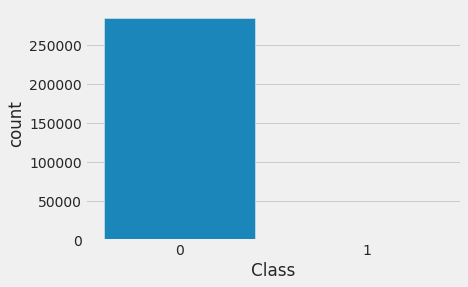

In [13]:
# Visualize the count of survivors
sns.countplot('Class', data=df);

The count of fraudulent transactions as compared to the non fraudulent one's is almost null. It makes it so difficult for us to classify the test data.

Remember, Rule 1 of the dataset is that the predicted value should be somewhat equally divided between the two classes!

**OBSERVATIONS**

► This dataset has 492 frauds out of 284,315 transactions. Thus, the dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

► Most of the transactions are non-fraud which is obvious. If we use this data for our predictive models and analysis, our algorithms will probably overfit to the non-fraudulent transactions and will answer in non-fraudulent all the time which can result in actual frauds to slip by!

► Note that our task is not to find the obvious, rather we have to find the anomalies and signs of fraud! Thus, we will take care of this imbalance during preprocessing.

In [14]:
print('Sample size : ' + str(df.shape[0]))
print('Number of Columns : ' + str(df.shape[1]))
for i in range(df.shape[1]) :
    print(df.columns[i], end = ' ')

Sample size : 284807
Number of Columns : 31
Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class 

## Data exploration

In [15]:
print("Fraud to NonFraud Ratio of {:.3f}%".format(492/284315*100))

Fraud to NonFraud Ratio of 0.173%


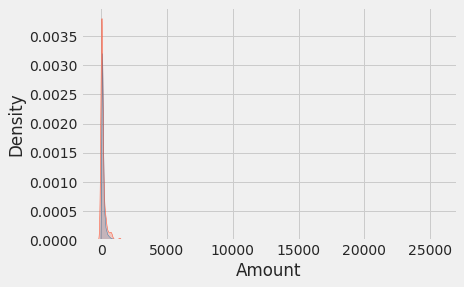

In [16]:
sns.kdeplot(df.Amount[df.Class == 0], label = 'Fraud', shade=True)
sns.kdeplot(df.Amount[df.Class == 1], label = 'NonFraud', shade=True)
plt.xlabel('Amount');

Looks like there a lot more instances of small fraud amounts than really large ones.

### Transactions in time

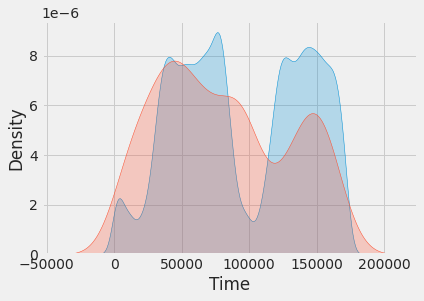

In [17]:
sns.kdeplot(df.Time[df.Class == 0], label = 'Non-Fraud', shade=True) #blue
sns.kdeplot(df.Time[df.Class == 1], label = 'Fraud', shade=True) #orange
plt.xlabel('Time');

We notice that the feature time doesn't seem to have an impact in the frequency of frauds.

In [18]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

 Let's plot the distribution of the classes with respect to time for both fraudulent and normal transactions.

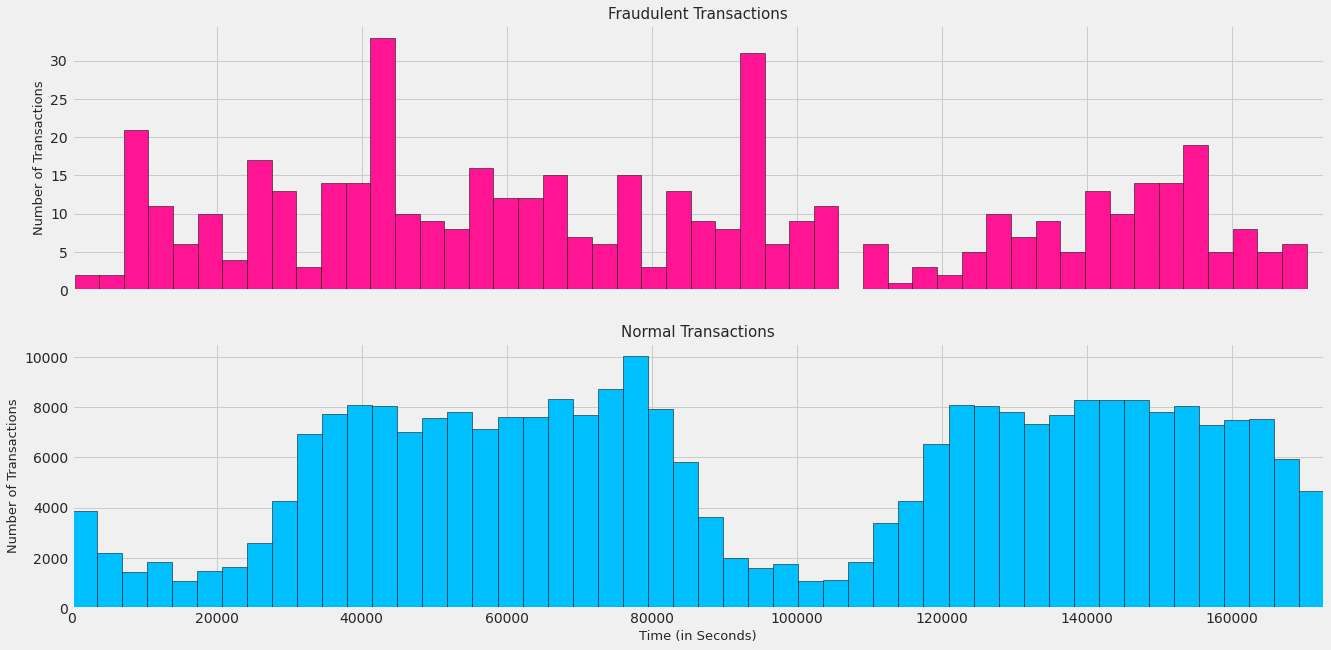

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = df.Time[df.Class == 1]
normal_transactions = df.Time[df.Class == 0]

ax1.hist(fraud_transactions, bins = 50, color='deeppink', edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color='deepskyblue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Normal Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

FRAUDULENT
► There are two peaks between 40000 seconds and 100000 seconds which were the maximum number of fraudulent transaction at any time.

NORMAL
► Normal transactions have not much to uncover except the fact that there were less transactions somewhere around 20000 seconds and 100000 seconds which is not very useful.
Let's do some feature engineering on time and transform it to minutes and hours to uncover some of the hidden patterns.

In [20]:
# converting seconds to time delta to extract hours and mins

timedelta = pd.to_timedelta(df['Time'], unit='s')

df['mins'] = (timedelta.dt.components.minutes).astype(int)
df['hours'] = (timedelta.dt.components.hours).astype(int)

► Let's look at the distribution of number of transactions for each hour for total, fraudulent and normal transactions.

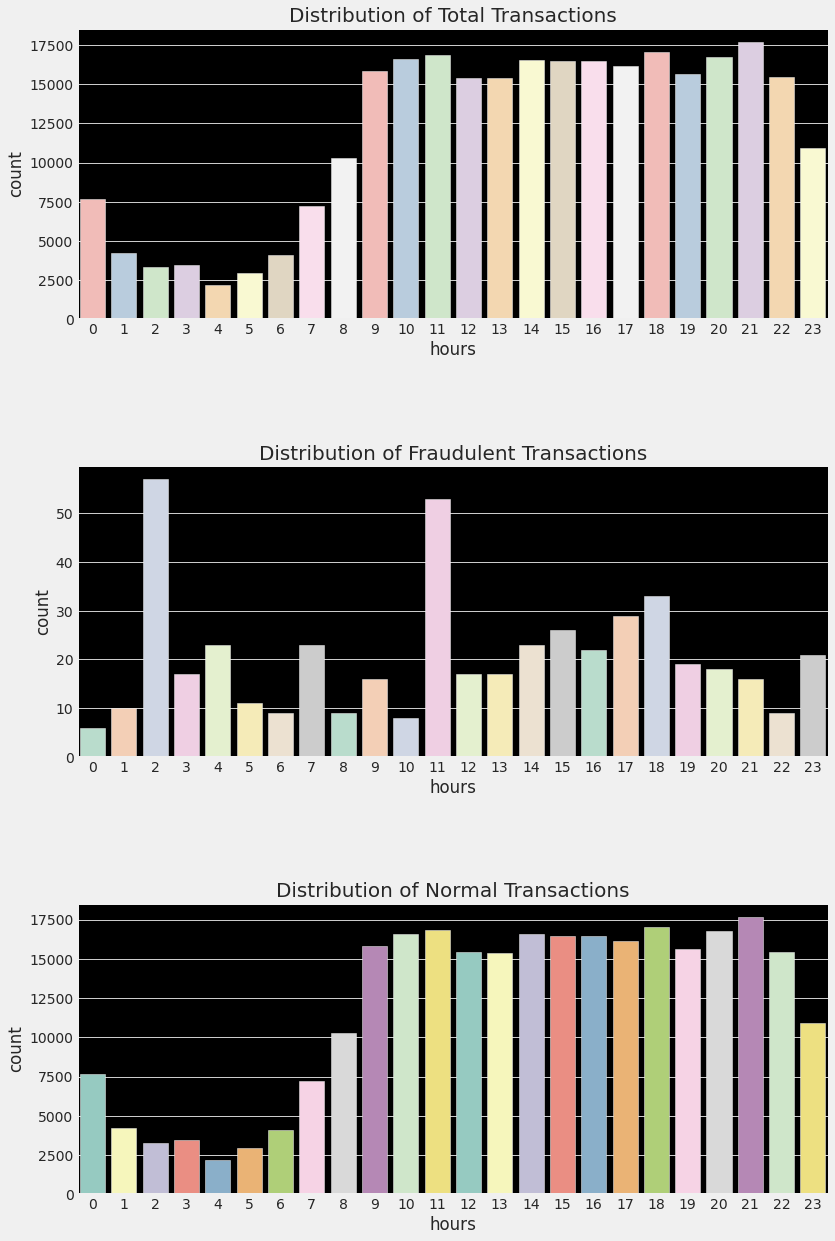

In [21]:
# Countplots for hours vs count of transactions

fig, axs = plt.subplots(3, figsize=(12,20))

fig.subplots_adjust(hspace=.5)

sns.countplot(df['hours'], ax = axs[0], palette="Pastel1")
axs[0].set_title("Distribution of Total Transactions",fontsize=20)
axs[0].set_facecolor("black")

sns.countplot(df[(df['Class'] == 1)]['hours'], ax=axs[1], palette='Pastel2')
axs[1].set_title("Distribution of Fraudulent Transactions", fontsize=20)
axs[1].set_facecolor('black')

sns.countplot(df[(df['Class'] == 0)]['hours'], ax=axs[2], palette='Set3')
axs[2].set_title("Distribution of Normal Transactions", fontsize=20)
axs[2].set_facecolor("black")

plt.show()

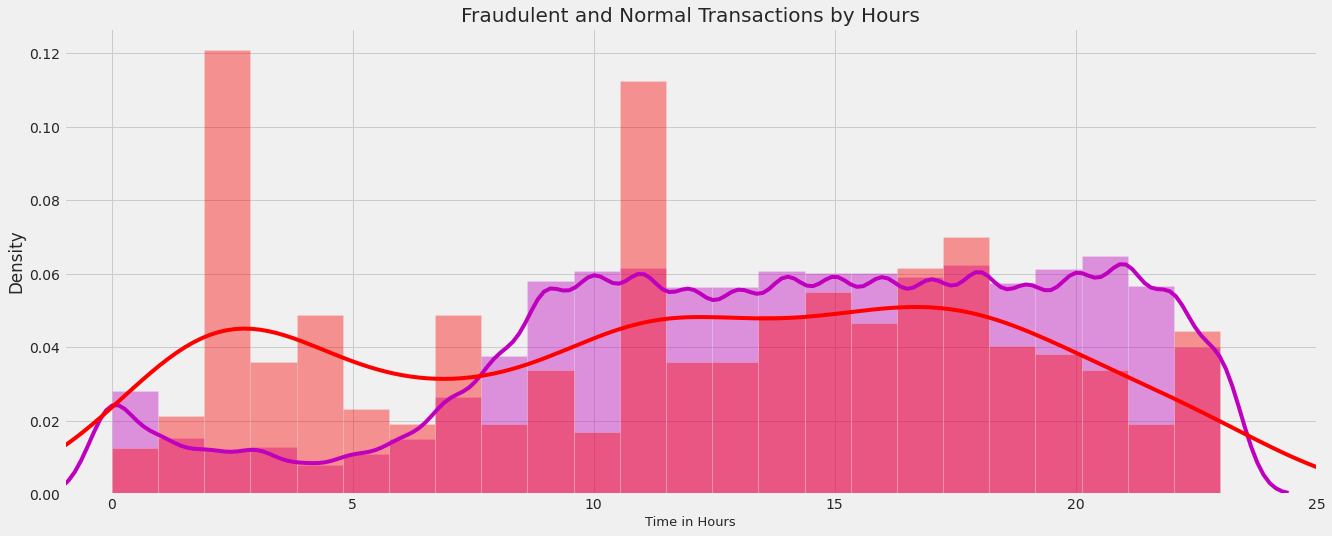

In [22]:
# Exploring the distribuition by Class types throught hours and minutes

plt.figure(figsize=(20,8))

sns.distplot(df[df['Class'] == 0]['hours'], bins=24, color='m')
sns.distplot(df[df['Class'] == 1]["hours"], bins=24, color='r')

plt.title('Fraudulent and Normal Transactions by Hours', fontsize=20)

plt.xlabel("Time in Hours", fontsize=13)
plt.xlim([-1,25])
plt.show()

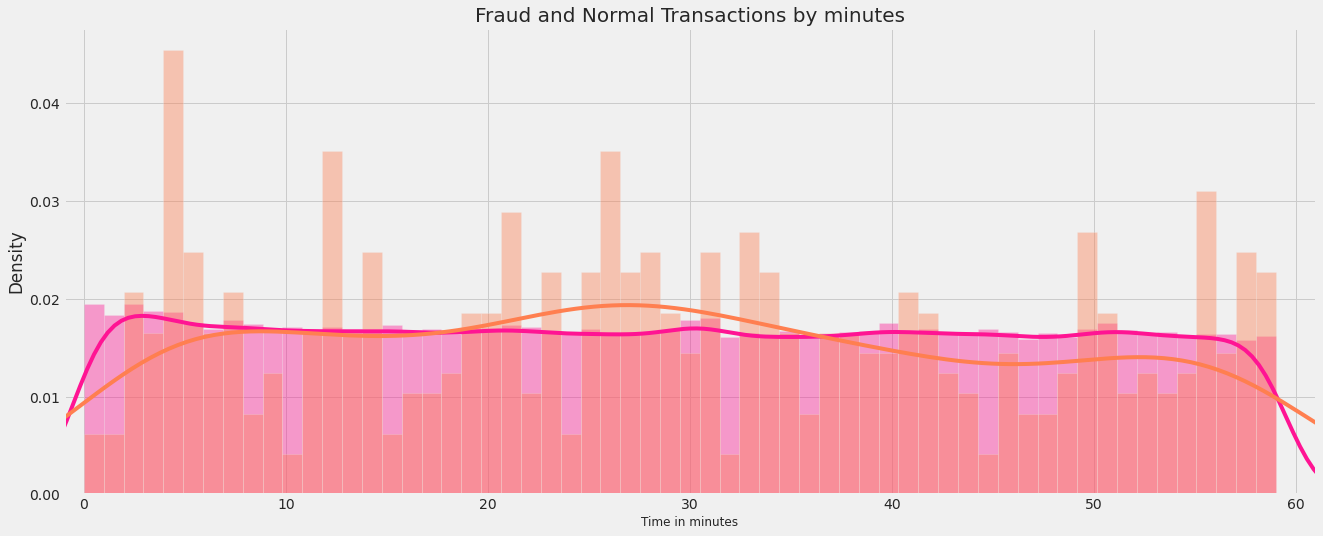

In [23]:
#Exploring the distribuition by Class types throught hours and minutes

plt.figure(figsize=(20,8))

sns.distplot(df[df['Class'] == 0]["mins"], bins =60, color='deeppink')
sns.distplot(df[df['Class'] == 1]["mins"], bins =60, color='coral')

plt.title('Fraud and Normal Transactions by minutes', fontsize=20)
plt.xlim([-1,61])
plt.xlabel("Time in minutes", fontsize=12)
plt.show()

**OBSERVATIONS**

► The plots of both hours and minutes doesn't have any interesting trend.

### Class and Amount vs Time

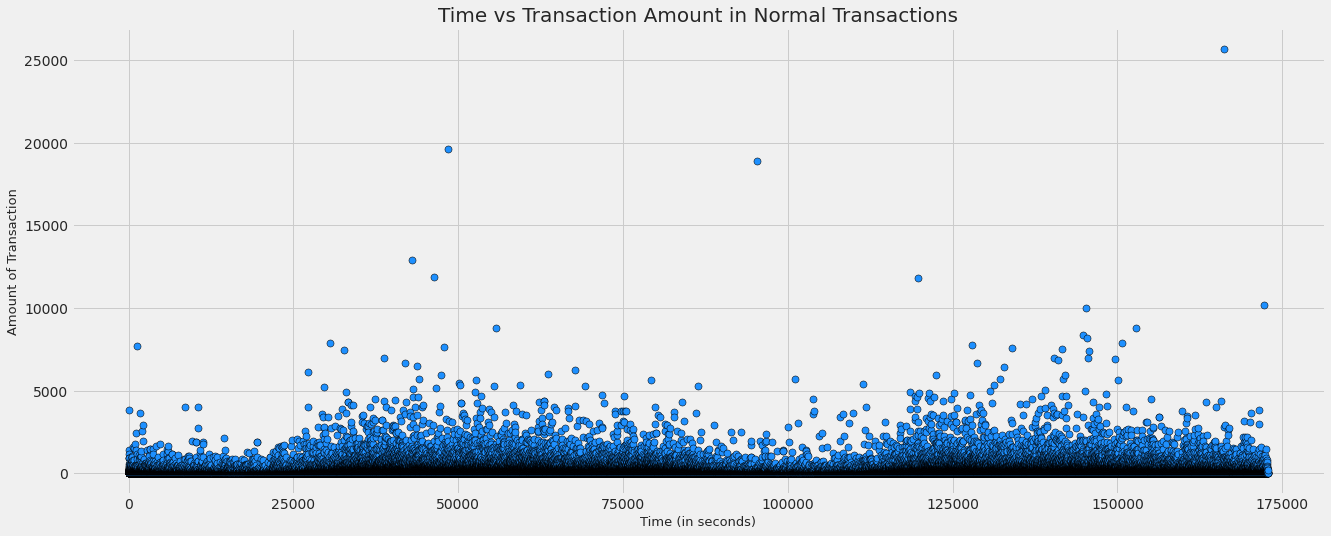

In [24]:
# Scatter plot of Class vs Amount and Time for Normal Transactions 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=df[df['Class'] == 0]['Time'], y=df[df['Class'] == 0]['Amount'], color="dodgerblue", s=50, edgecolor='black')
plt.title("Time vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

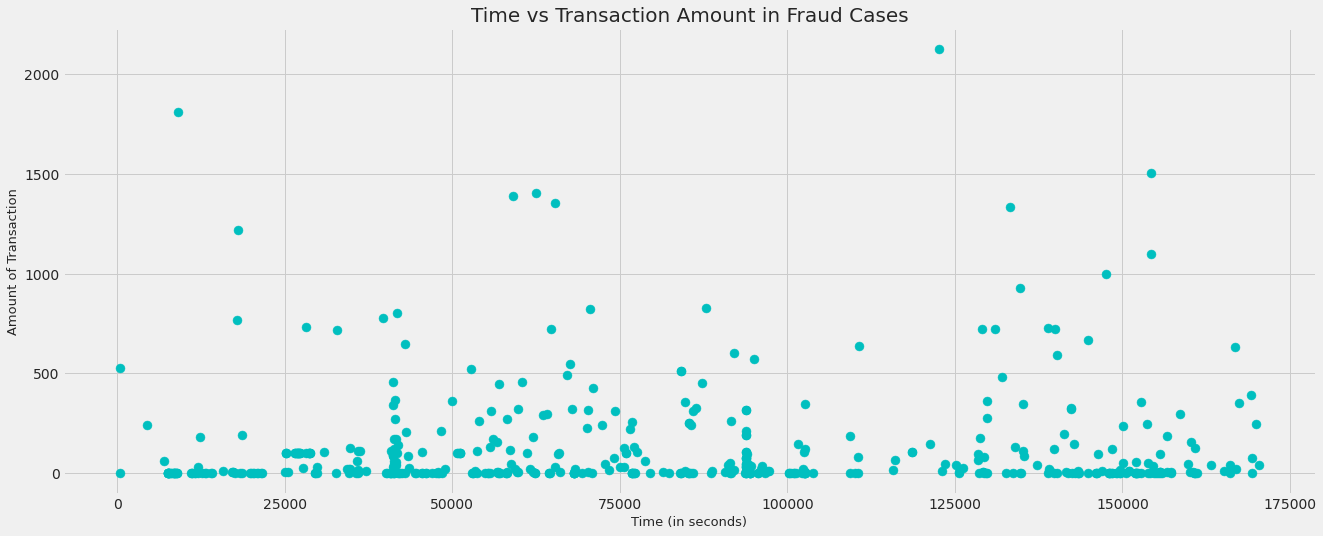

In [25]:
# Scatter plot of Class vs Amount and Time for Fraudulent Transactions 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color="c", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

OBSERVATIONS

FRAUDULENT
► There are much more outliers as compared to normal transactions.

► The plot seems to not have any inherent pattern.


NORMAL
► There are a less number of outliers as compared to fraudulent transactions.

► There are a lot of transactions with amount less than 5000.

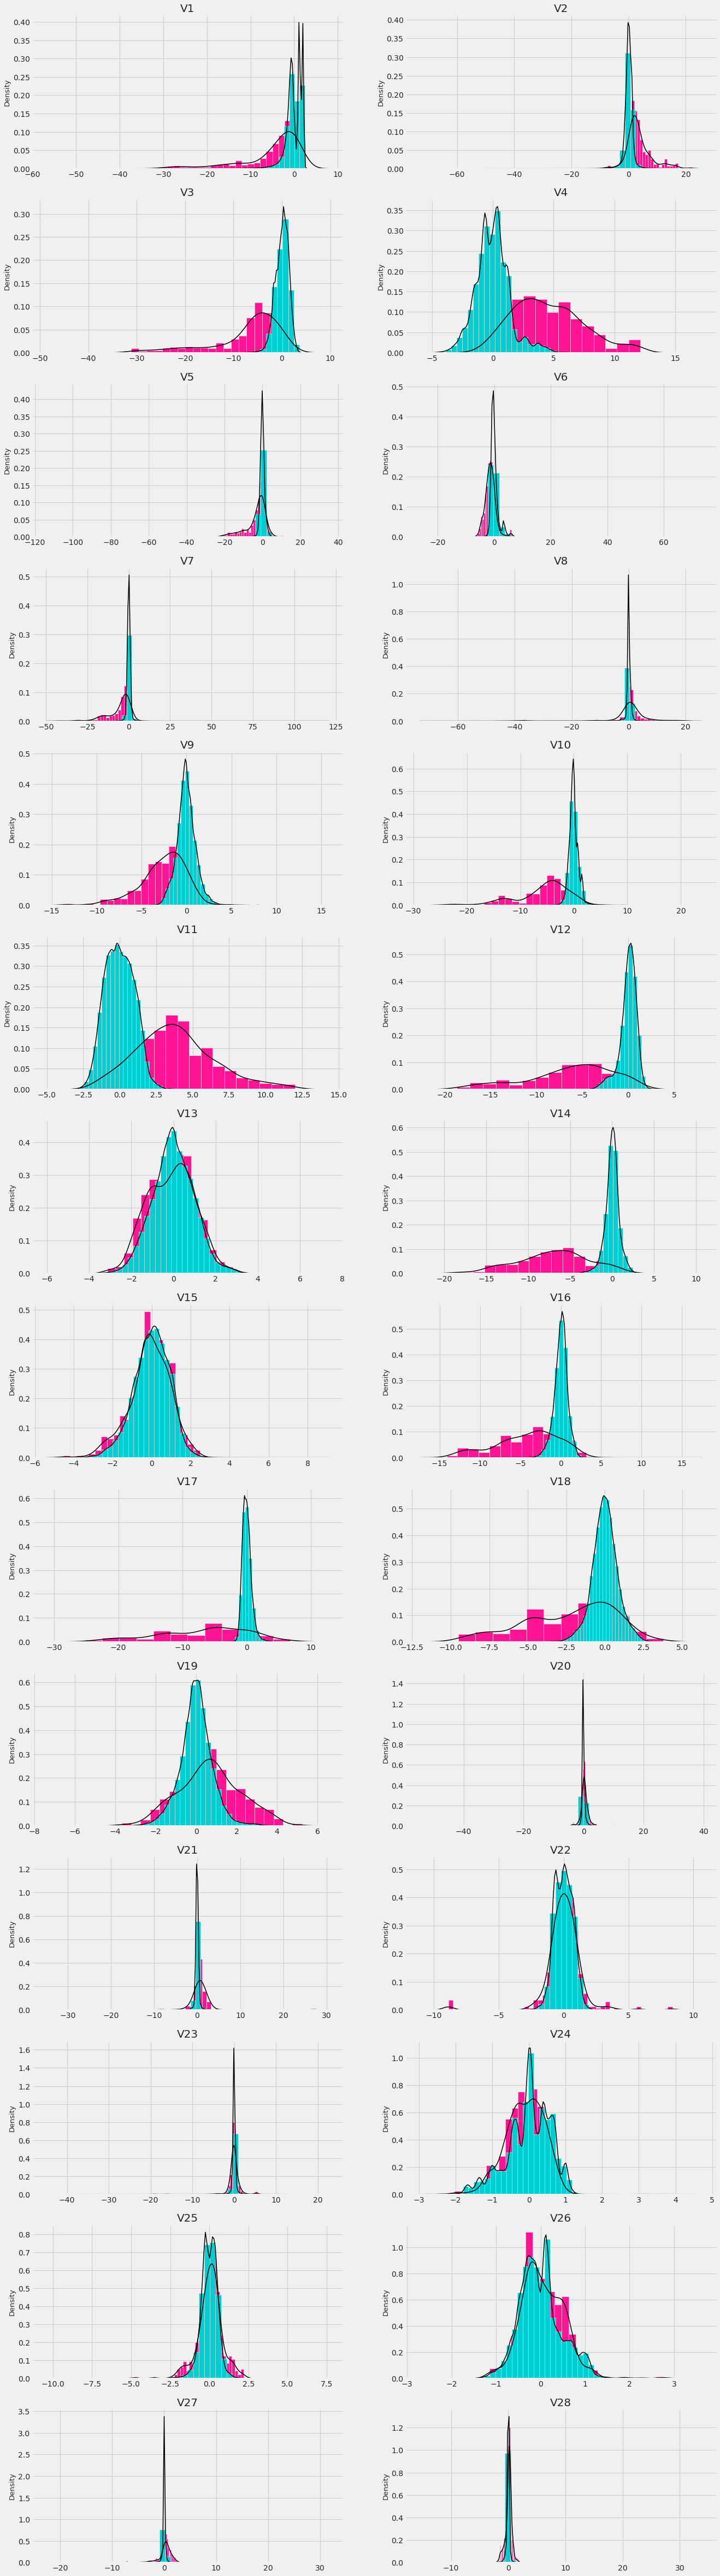

In [26]:
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], color='deeppink', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(df[col][normals],color='darkturquoise', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show();

OBSERVATIONS

► For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V20-V28 have similar profiles for the two values of Class and thus not very useful in differentiation of both the classes.

► In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

### Transactions amount

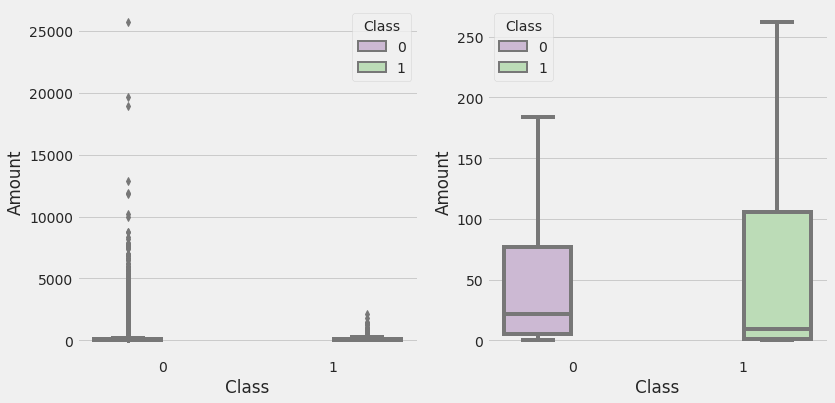

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

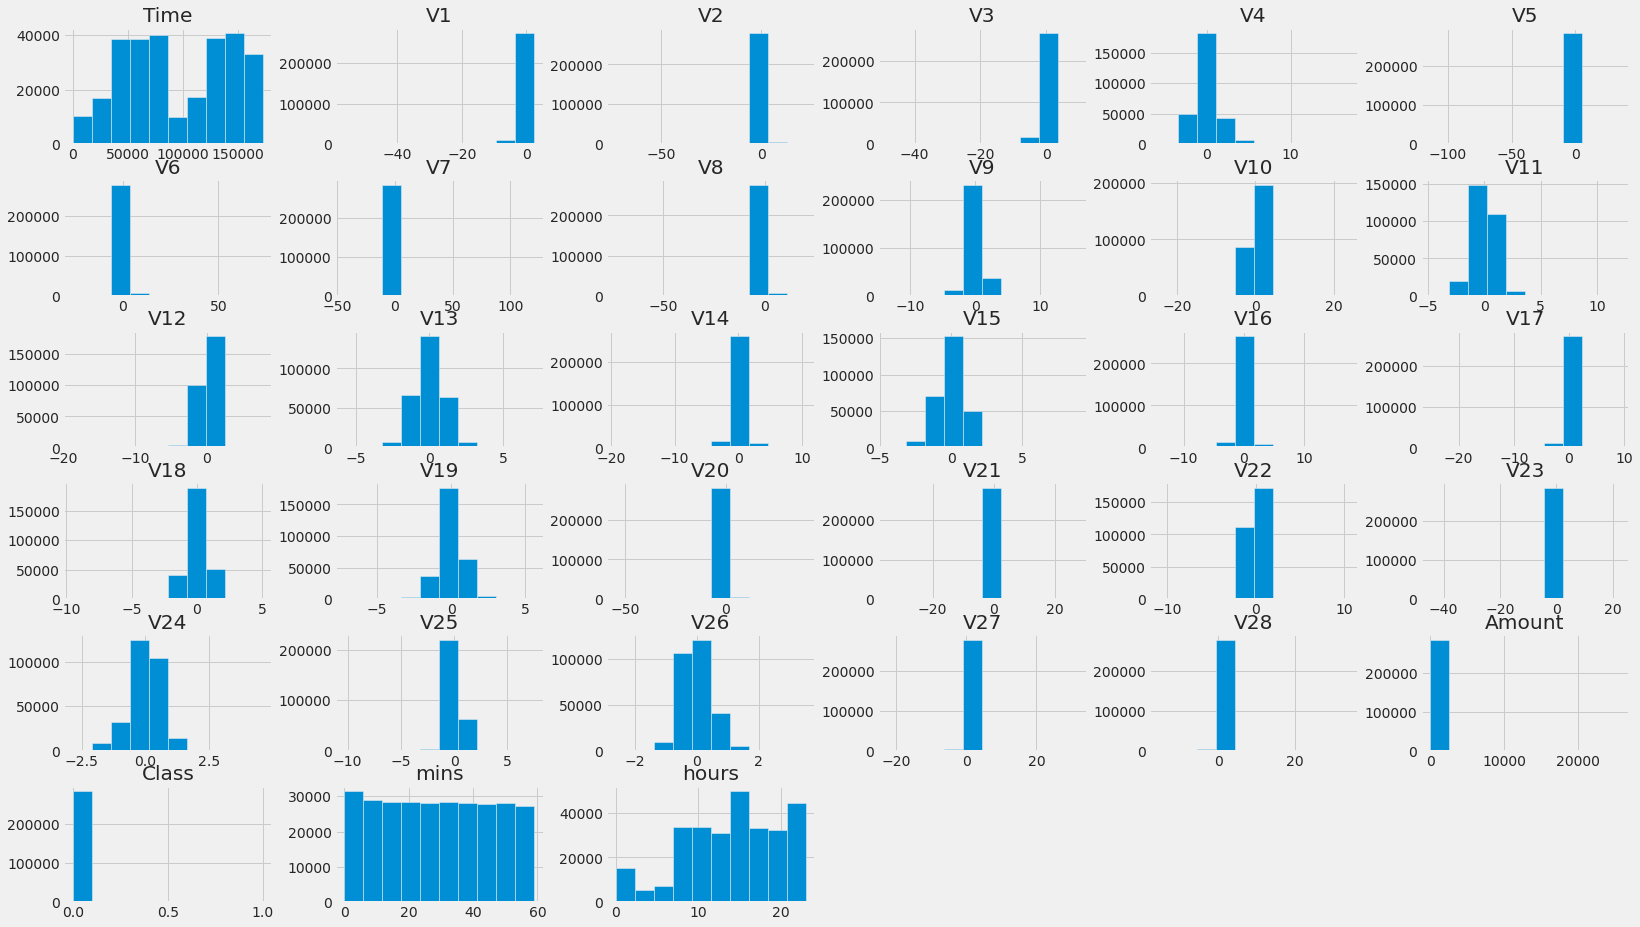

In [28]:
# Graphical representation of each column
df.hist(figsize = (25, 15))
plt.show()
# It can be observed below that the data is highly skewed to '0' label.

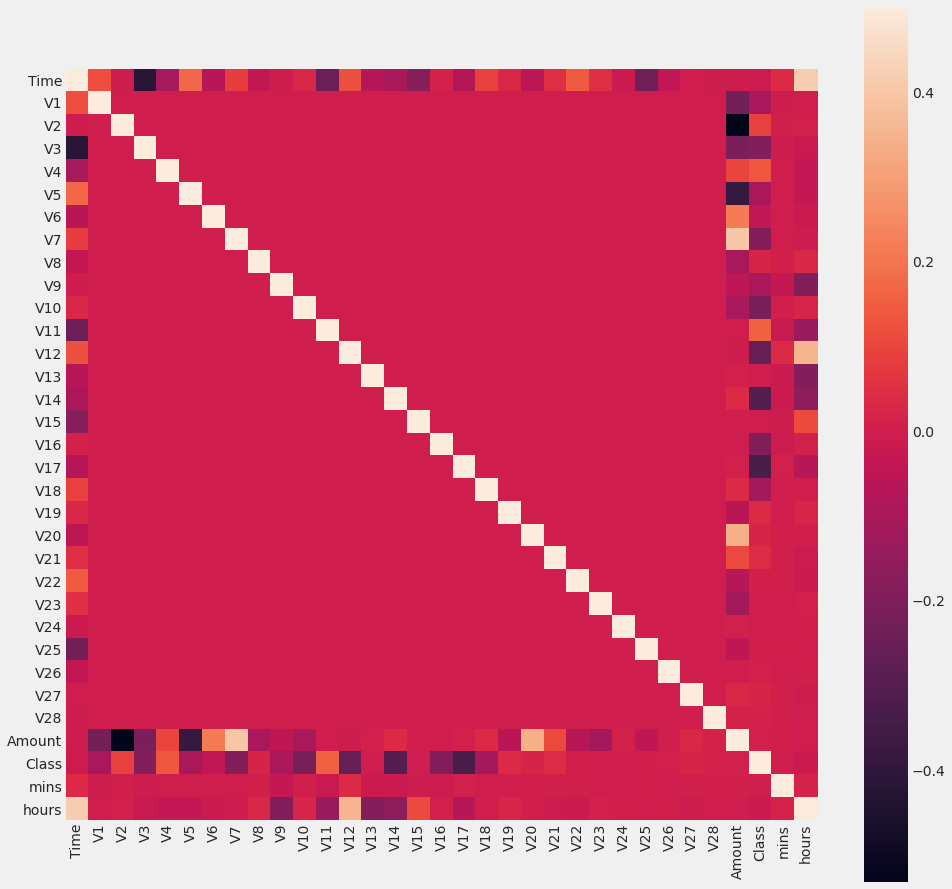

In [29]:
# Let's look if there is some correlation among the features
mat = df.corr()
fig = plt.figure(figsize = (15, 15))
sns.heatmap(mat, vmax = .5, square = True)
plt.show()

It can be seen above there are almost no significant correlations. Though negative correlation does exist (eg. V3 and Time), but this is not enough to convince us to remove any feature as all of them are real-world data and may count as significant in later training.

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

## Data Cleaning and Preprocessing

In [30]:
# copy of data for future use

temp = df.copy()

Outlier Removal

► As we already saw that amount column has a extreme outliers so it necessary to remove them as they can effect the model's performance. We will used Interquartile range to detect outliers which removes anything below the lower limit (25 percentile) and anything above upper limit (75 Percentile).

► Note that, the data we have for fraudulent cases is very low so we wanna keep our cutoff a bit high so as avoid removing much of the fraud cases. Here, as the data is skewed (kind of exponential) so having high cutoff will help us. Let's take the cutoff value as 5.0 instead of 1.5 which is usually used.

## Build Machine Learning Model

we will finally apply models and classify whether a certain transaction done a particular time is fraud or geniune. Thus, this is a binary classification problem.

we might get very high accuracy but we should focus on optimising out f1_score and recall as we want to perform better on fraud cases as they are the most important.

* <font size = 3>IsolationForest Model</font> :
    1. Unsupervised training model
    2. Model randomly selects a feature and splits it in between maximum and minimum values.
    3. This is done recursively to make a decision tree.
    4. Path is the number of edges between root and target node
    4. Arguably anomalies have a shorter path length compared to 'normal' samples.
* <font size = 3>MultiLayer Perceptron</font> :
    1. Supervised learning model
    2. MLPs are trained to classify between anomalies and normal samples by feeding labels to them.
    3. Do not perform well in cases of skewed dataset as in the cases of Anomaly Detection.
* <font size = 3>Random Forest Classifier</font> :
    1. Ensemble of decision trees.
    2. Model involves training by sampling the dataset with replacement.
    3. These samples are used to fit different decision trees.
    4. Classification is done on the basis of majority labels predicted.

In [32]:
# declare a dictionary to hold the models
models_dict = {}

In [43]:
# Let's define the IsolationForest Model
def IsF (X, y, ratio) :
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    # define the model
    model = IsolationForest(n_estimators = 200, contamination = ratio, random_state = 1)
    
    # train the model
    model.fit(X_train, y_train)
    
    # predict on the test set
    predictions = model.predict(X_test)
    
    # Convert the predictions according to problem profile
    predictions[predictions ==  1] = 0
    predictions[predictions == -1] = 1
    
    # evaluate the accuracy and classification report
    print('IsF : ' + str(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    
    # assign this to models_dict
    models_dict['IsF'] = model

In [44]:
# Let's define the MultiLayer Perceptron
def MLP (X, y, param) :
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    # hyper-parameters
    nodes = param['nodes']
    lrate = param['lrate']
    toler = param['toler']
    batch = param['batch_size']
    
    # define the model
    model = MLPClassifier(hidden_layer_sizes = (nodes,), tol = toler, batch_size = batch, learning_rate_init = lrate,
                          verbose = 0, random_state = 1)
    
    # train the model
    model.fit(X_train, y_train)
    
    # predict on the test set
    predictions = model.predict(X_test)
    
    # evaluate the accuracy and classification report
    print('MLP : ' + str(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    
    # assign this to models_dict
    models_dict['MLP'] = model

In [35]:
# Let's define the Random Forest Classifier Model
def RFR (X, y, split) :
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    # define the model
    model = RandomForestClassifier(n_estimators = 200, criterion = 'gini', min_samples_split = split, random_state = 1)
    
    # train the model
    model.fit(X_train, y_train)
    
    # predict on the test set
    predictions = model.predict(X_test)
    
    # evaluate the accuracy and classification report
    print('RFR : ' + str(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    
    # assign this to models_dict
    models_dict['RFR'] = model

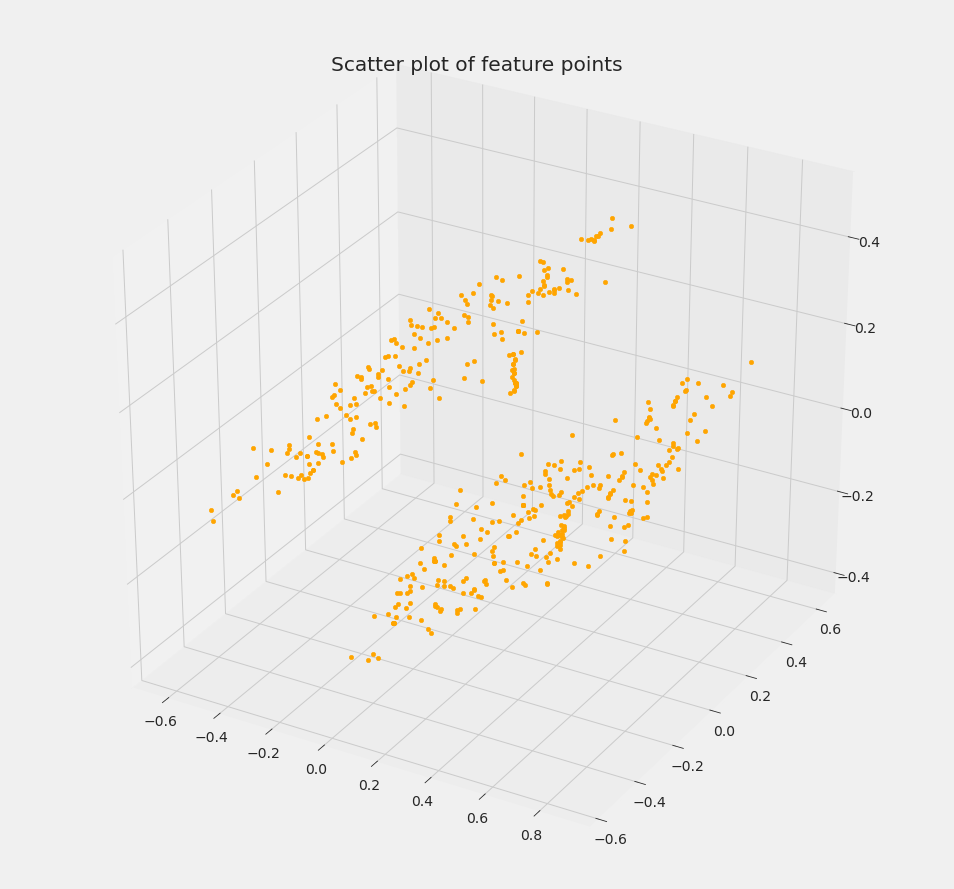

In [37]:
# Shuffle the dataframe df
df = df.sample(frac = 1).reset_index(drop = True)

# Get matrix feature set X 
X = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])

# scale b/w [-1, 1]
X = MaxAbsScaler().fit_transform(X)

# Apply dimensionality reduction using Principal Component Analysis
pca = PCA(n_components = 3)
X = pca.fit_transform(X, y)

# plot the graph
fig = plt.figure(figsize = (15, 15))
axs = plt.axes(projection = '3d')
for i in range(X.shape[0]) :
    if y[i] == 1 :
        axs.scatter3D(X[i,0], X[i,1], X[i,2], color = 'orange')
plt.title('Scatter plot of feature points')
plt.show()

In [38]:
# Extract from the dataframe, class 1s and 0s
df_1 = df[df['Class'] == 1].sample(frac = 1.0).reset_index(drop = True)
df_2 = df[df['Class'] == 0].sample(frac = 1.0).reset_index(drop = True)

# Split each dataframe to certain fraction
new_df_1, old_df_1 = df_1[: 480].reset_index(drop = True), df_1[480 :].reset_index(drop = True)
new_df_2, old_df_2 = df_2[: 999].reset_index(drop = True), df_2[999 :].reset_index(drop = True)

# group them into test and train sets
test, train = pd.concat([new_df_1, new_df_2]), pd.concat([old_df_1, old_df_2])
test, train = test.sample(frac = 1.0).reset_index(drop = True), train.sample(frac = 1.0).reset_index(drop = True)

In [49]:
test.Class.value_counts()

0    999
1    480
Name: Class, dtype: int64

In [50]:
train.Class.value_counts()

0    283316
1        12
Name: Class, dtype: int64

In [39]:
# Now divide train dataframe into 'X' and 'y'
X_train = np.array(train.drop(['Class'], axis = 1))
y_train = np.array(train['Class'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
# Assigning important parameters for the models

# For Isolation Forest Model
ratio = float(y_train[y_train == 1].shape[0]/y_train.shape[0])

# For Multi Layer Perceptron
param = {
    'nodes' : 170,
    'lrate' : 0.00005,
    'toler' : 0.00001,
    'batch_size' : 100
}

# For Random Forest Classifier
split = 2

In [46]:
IsF(X_train, y_train, ratio)
MLP(X_train, y_train, param)
RFR(X_train, y_train, split)

IsF : 0.9999764703114155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84998
           1       0.00      0.00      0.00         1

    accuracy                           1.00     84999
   macro avg       0.50      0.50      0.50     84999
weighted avg       1.00      1.00      1.00     84999

MLP : 0.9999764703114155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84998
           1       0.00      0.00      0.00         1

    accuracy                           1.00     84999
   macro avg       0.50      0.50      0.50     84999
weighted avg       1.00      1.00      1.00     84999

RFR : 0.9999882351557077
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84998
           1       0.00      0.00      0.00         1

    accuracy                           1.00     84999
   macro avg       0.50      0.50      0.50     84999

In [47]:
# Divide test dataframe into 'X' and 'y'
X_test = np.array(test.drop(['Class'], axis = 1))
y_test = np.array(test['Class'])

# Test it on all the three models
# IsF
pred_1 = models_dict['IsF'].predict(X_test)
pred_1[pred_1 ==  1] = 0
pred_1[pred_1 == -1] = 1
print('IsF : ' + str(accuracy_score(y_test, pred_1)))
print(classification_report(y_test,pred_1))

# MLP
pred_2 = models_dict['MLP'].predict(X_test)
print('MLP : ' + str(accuracy_score(y_test, pred_2)))
print(classification_report(y_test,pred_2))

# RFR
pred_3 = models_dict['RFR'].predict(X_test)
print('RFR : ' + str(accuracy_score(y_test, pred_3)))
print(classification_report(y_test,pred_3))


IsF : 0.6754563894523327
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       999
           1       0.00      0.00      0.00       480

    accuracy                           0.68      1479
   macro avg       0.34      0.50      0.40      1479
weighted avg       0.46      0.68      0.54      1479

MLP : 0.676132521974307
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       999
           1       1.00      0.00      0.00       480

    accuracy                           0.68      1479
   macro avg       0.84      0.50      0.41      1479
weighted avg       0.78      0.68      0.55      1479

RFR : 0.7342799188640974
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       999
           1       1.00      0.18      0.31       480

    accuracy                           0.73      1479
   macro avg       0.86      0.59      0.57      1479


<font size = 3>We will use <strong>Conditional Generative Adversarial Networks</strong> which is a development over GANs. So first a brief description of GANs is necessary.</font>
* GANs :
    1. is model in which two components - **Discriminator and Generator are in zero sum game**.
    2. The aim of the discriminator is to differentiate between real data from the generated data.
    3. The aim of the generator is to trick the discriminator into classifying the generated samples as real.
    4. After training, a stand-alone Generator is capable of producing samples conforming to the real sample set.
* cGAN :
    1. Conditional GANs or cGANs is a modification over GANs for targeted sampling, ie. for a label.
    2. This done by adding the class label to the layers of both Discriminator and Generator models.
    3. This method tackles the issues of losing information (as seen in undersampling) and overfitting (noticed in oversampling).

Generative Adversarial Networks, or GANs, are an architecture for training generative models, such as deep convolutional neural networks for generating images.
Although GAN models are capable of generating new random plausible examples for a given dataset, there is no way to control the types of images that are generated other than trying to figure out the complex relationship between the latent space input to the generator and the generated images.

The conditional generative adversarial network, or cGAN for short, is a type of GAN that involves the conditional generation of images by a generator model. Image generation can be conditional on a class label, if available, allowing the targeted generated of images of a given type.

**Conditional Generative Adversarial Networks**

A generative adversarial network, or GAN for short, is an architecture for training deep learning-based generative models.

The architecture is comprised of a generator and a discriminator model. The generator model is responsible for generating new plausible examples that ideally are indistinguishable from real examples in the dataset. The discriminator model is responsible for classifying a given image as either real (drawn from the dataset) or fake (generated).

The models are trained together in a zero-sum or adversarial manner, such that improvements in the discriminator come at the cost of a reduced capability of the generator, and vice versa.

GANs are effective at image synthesis, that is, generating new examples of images for a target dataset. Some datasets have additional information, such as a class label, and it is desirable to make use of this information.

For example, the MNIST handwritten digit dataset has class labels of the corresponding integers, the CIFAR-10 small object photograph dataset has class labels for the corresponding objects in the photographs, and the Fashion-MNIST clothing dataset has class labels for the corresponding items of clothing.

There are two motivations for making use of the class label information in a GAN model.

1.Improve the GAN.
2.Targeted Image Generation.

Additional information that is correlated with the input images, such as class labels, can be used to improve the GAN. This improvement may come in the form of more stable training, faster training, and/or generated images that have better quality.

Class labels can also be used for the deliberate or targeted generation of images of a given type.

A limitation of a GAN model is that it may generate a random image from the domain. There is a relationship between points in the latent space to the generated images, but this relationship is complex and hard to map.

Alternately, a GAN can be trained in such a way that both the generator and the discriminator models are conditioned on the class label. This means that when the trained generator model is used as a standalone model to generate images in the domain, images of a given type, or class label, can be generated.

For example, in the case of MNIST, specific handwritten digits can be generated, such as the number 9; in the case of CIFAR-10, specific object photographs can be generated such as ‘frogs‘; and in the case of the Fashion MNIST dataset, specific items of clothing can be generated, such as ‘dress.’

This type of model is called a Conditional Generative Adversarial Network, CGAN or cGAN for short.



The first step is to define the models.

The discriminator would be supplied a set of images that consisted of both real and generated images and it would generate outputs a binary prediction as to whether the image is real (class=1) or fake (class=0). It is implemented as a modest convolutional neural network using best practices for GAN design such as using the LeakyReLU activation function with a slope of 0.2, using a 2×2 stride to downsample, and the adam version of stochastic gradient descent with a learning rate of 0.0002 and a momentum of 0.5.

The error between the discriminator output and the actual labels would then be measured by cross-entropy loss. 

In [ ]:
# Let's define the discriminator which takes inputs the feature
# matrix and class vector and predicts the probability of being
# fake or real (0 or 1)
# 2 Hidden Layer with each layer has 200 nodes
def dis () :
    
    # define the feature input
    feature = keras.Input(shape = (30,))
    
    # define the labels  input
    labels  = keras.Input(shape = (1, ))
    
    # merge the two layers
    merge = keras.layers.Concatenate()([feature,labels])
    
    # add one hidden layer
    model = keras.layers.Dense(200)(merge)
    model = keras.layers.LeakyReLU(alpha = 0.2)(model)
    
    model = keras.layers.Dense(200)(merge)
    model = keras.layers.LeakyReLU(alpha = 0.2)(model)
    
    # add the output layer
    model = keras.layers.Dense(1,activation='sigmoid')(model)
    
    # create a model from the pipeline
    d_model = keras.Model(inputs = [feature,labels], outputs = model, name = 'discriminator')
    
    # compile the model
    d_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0002), loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
    
    # return the model
    return d_model

The generator model takes as input a point in the latent space and outputs a dataset has 30 features. This is achieved by using a fully connected layer to interpret the point in the latent space. The model uses best practices such as the LeakyReLU activation, a kernel size that is a factor of the stride size, and a hyperbolic tangent (tanh) activation function in the output layer.

In [ ]:
# Let's define the generator which takes as input latent
# space and class labels and ouputs a feature matrix 'X'
# generator has 3 hidden layer with 150x200x150 nodes
def gen () :
    
    # define the latent space
    latent = keras.Input(shape = (99,))
    
    # define the label vector
    labels = keras.Input(shape = (1, ))
    
    # merge the two layers
    merge = keras.layers.Concatenate()([latent, labels])
    
    # create 1 hidden layer
    model = keras.layers.Dense(150)(merge)
    model = keras.layers.LeakyReLU(alpha = 0.2)(model)
    
    # create 2 hidden layer
    model = keras.layers.Dense(200)(model)
    model = keras.layers.LeakyReLU(alpha = 0.2)(model)
    
    # create 3 hidden layer
    model = keras.layers.Dense(150)(merge)
    model = keras.layers.LeakyReLU(alpha = 0.2)(model)
    
    # create an ouptput layer
    model = keras.layers.Dense(30, activation ='tanh')(model)
    
    # create a model from the pipeline
    g_model = keras.Model(inputs = [latent, labels], outputs = model, name = 'generator')
    
    # return the model
    return g_model

A GAN model can be defined that combines both the generator model and the discriminator model into one larger model. This larger model will be used to train the model weights in the generator, using the output and error calculated by the discriminator model. The discriminator model is trained separately, and as such, the model weights are marked as not trainable in this larger GAN model to ensure that only the weights of the generator model are updated. This change to the trainability of the discriminator weights only has an effect when training the combined GAN model, not when training the discriminator standalone.

This larger GAN model takes as input a point in the latent space, uses the generator model to generate data which is fed as input to the discriminator model, then is output or classified as real or fake.

In [ ]:
# Combine the discriminator and Generator into cGAN
# Keep discriminator as non-trainable, so it does
# not update its weights during training the cgan.
def gan (discriminator, generator) :
    
    # Make discriminator as non-trainable
    discriminator.trainable = False
    
    # get inputs from the generator
    gen_latent, gen_labels  = generator.input
    
    # get output from the generator
    gen_feature = generator.output
    
    # get discriminator predictions
    dis_predict = discriminator([gen_feature, gen_labels])
    
    # create a model from the pipeline
    cgan_model  = keras.Model(inputs = [gen_latent, gen_labels], outputs = dis_predict, name = 'cGAN')
    
    # compile the model
    cgan_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0002), loss = 'binary_crossentropy')
    
    # return the model
    return cgan_model

In [ ]:
# shuffle the dataframe df
df = df.sample(frac = 1.0).reset_index(drop = True)

# Get the new feature matrix and class label
X = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])

# oversample the fraudulent data to make it atleast substantial
#oversample = SMOTE(sampling_strategy = 0.1, random_state = 1, k_neighbors = 5)
#X, y = oversample.fit_resample(X, y)

# rescale the feature matrix 'X' b/w [-1, 1]
X = MaxAbsScaler().fit_transform(X)

We will require one batch (or a half) batch of real datas from the dataset each update to the GAN model. A simple way to achieve this is to select a random sample of fraud datas from the dataset each time.

The generate_real_samples() function below implements this, taking the prepared dataset as an argument, selecting and returning a random sample of real datas and their corresponding class label for the discriminator, specifically class=1, indicating that they are real images.

In [ ]:
# Let's define a generate_real_samples
# method to generate random samples as
# real data
def generate_real_samples (n_samples) :
    
    # generate n_samples number of random indices
    indices = np.random.randint(0, X.shape[0], n_samples)
    
    # get the newly indexed matrix and vector
    X_real = np.array([X[j]for j in indices])
    y_real = np.array([y[j]for j in indices])
    
    # classify them as '1' (real)
    y_labels = np.ones((n_samples,1))
    
    # return the computed arrays
    return [X_real, y_real], y_labels

Next, we need inputs for the generator model. These are random points from the latent space, specifically Gaussian distributed random variables.

The generate_latent_points() function implements this, taking the size of the latent space as an argument and the number of points required and returning them as a batch of input samples for the generator model.

In [ ]:
# Let's define a generate_fake_samples
# method to generate random samples as
# fake data from latent sapce
def generate_latent_point (n_samples) :
    
    # create an array of n_samples * late
    # -nt_space (= 99)
    Z_lat = np.random.randn(n_samples*99)
    X_lat = Z_lat.reshape(n_samples , 99)
    
    # randomly generate the class labels 'y'
    y_lat = np.random.randint(0, 2, n_samples)
    
    # return the points
    return [X_lat, y_lat]


Next, we need to use the points in the latent space as input to the generator in order to generate new fake datas.

The generate_fake_samples() function below implements this, taking the generator model and size of the latent space as arguments, then generating points in the latent space and using them as input to the generator model. The function returns the generated datas and their corresponding class label for the discriminator model, specifically class=0 to indicate they are fake or generated.

In [ ]:
def generate_fake_samples (generator, n_samples) :
    
    # generate n_samples points in latent space 
    [X_lat, y_lat] = generate_latent_point(n_samples)
    
    # predict on them using the generator
    X_fake = generator.predict([X_lat, y_lat])
    
    # classify them as '0' (fake)
    y_labels = np.zeros((n_samples, 1))
    
    # return the computed arrays
    return [X_fake, y_lat], y_labels

In [ ]:
# plot the loss functions on the graph
def plot_history (d_real, d_fake, g) :
    
    fig = plt.figure(figsize =(15,15))
    
    plt.plot(d_real, label = 'd_real')
    plt.plot(d_fake, label = 'd_fake')
    plt.plot(g, label = 'cGAN_loss')
    
    # specify legend
    plt.legend()
    
    # plot the graph
    plt.show()

In [ ]:
# train the model
def train (discriminator, generator, cgan, batch_size = 256, epochs = 20) :
    
    count = 0
    half_batch = int(batch_size/2)
    batch_per_epoch = int(X.shape[0]/batch_size)
    
    d_real = []
    d_fake = []
    g = []
    for i in range(epochs) :
        for j in range(batch_per_epoch) :
            
            # real
            [X_real, y_real], y_labels_real = generate_real_samples(half_batch)
            # loss on real
            d1_loss, _ = discriminator.train_on_batch([X_real, y_real], y_labels_real)
            # fake
            [X_fake, y_fake], y_labels_fake = generate_fake_samples(generator, 
                                                                    half_batch)
            # loss on fake
            d2_loss, _ = discriminator.train_on_batch([X_fake, y_fake], y_labels_fake)
            
            # Generate latent points
            [X_lat, y_lat] = generate_latent_point(batch_size)
            # Give them '1' labels
            y_labels_lat = np.ones((batch_size, 1))
            # calculate generator loss
            gan_loss = cgan.train_on_batch([X_lat, y_lat], y_labels_lat)
            
            # print the results
            count += 1
            if count%1000 == 0 :
                print('{: > 5} | {: > 5} | {: > 5} | {: > 5}'.format(count, d1_loss, d2_loss, gan_loss))
                
            # store the losses
            d_real.append(d1_loss)
            d_fake.append(d2_loss)
            g.append(gan_loss)
        
    # plot a summary of loss
    plot_history(d_real, d_fake, g)

In [ ]:
discriminator = dis()
generator = gen()
cgan = gan(discriminator, generator)

print(generator.summary())     # summary for dis
print(discriminator.summary()) # summary for gen
print(cgan.summary())          # summary for gan

Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 99)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 100)          0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 150)          15150       concatenate_3[0][0]      

 1000 |  0.39604562520980835 |  0.33306455612182617 |  2.2184677124023438
 2000 |  0.41049903631210327 |  0.429882287979126 |  3.0943665504455566
 3000 |  0.4061626195907593 |  0.6514036059379578 |  3.4497194290161133
 4000 |  0.4171311855316162 |  0.49847838282585144 |  2.873654365539551
 5000 |  0.3987386226654053 |  0.5002840757369995 |  2.9069855213165283
 6000 |  0.3931557536125183 |  0.6354260444641113 |  3.193239450454712
 7000 |  0.4317295551300049 |  0.6129738092422485 |  3.417893409729004
 8000 |  0.40675750374794006 |  0.532287061214447 |  3.142406463623047
 9000 |  0.3900381922721863 |  0.5607140064239502 |  3.068585157394409
 10000 |  0.4071658253669739 |  0.47440218925476074 |  2.804108142852783
 11000 |  0.3920568823814392 |  0.5823779702186584 |  3.5073843002319336
 12000 |  0.3961864709854126 |  0.44790494441986084 |  3.118589401245117
 13000 |  0.44178929924964905 |  0.5439863801002502 |  3.2213618755340576
 14000 |  0.4084979295730591 |  0.5651447772979736 |  3.21719

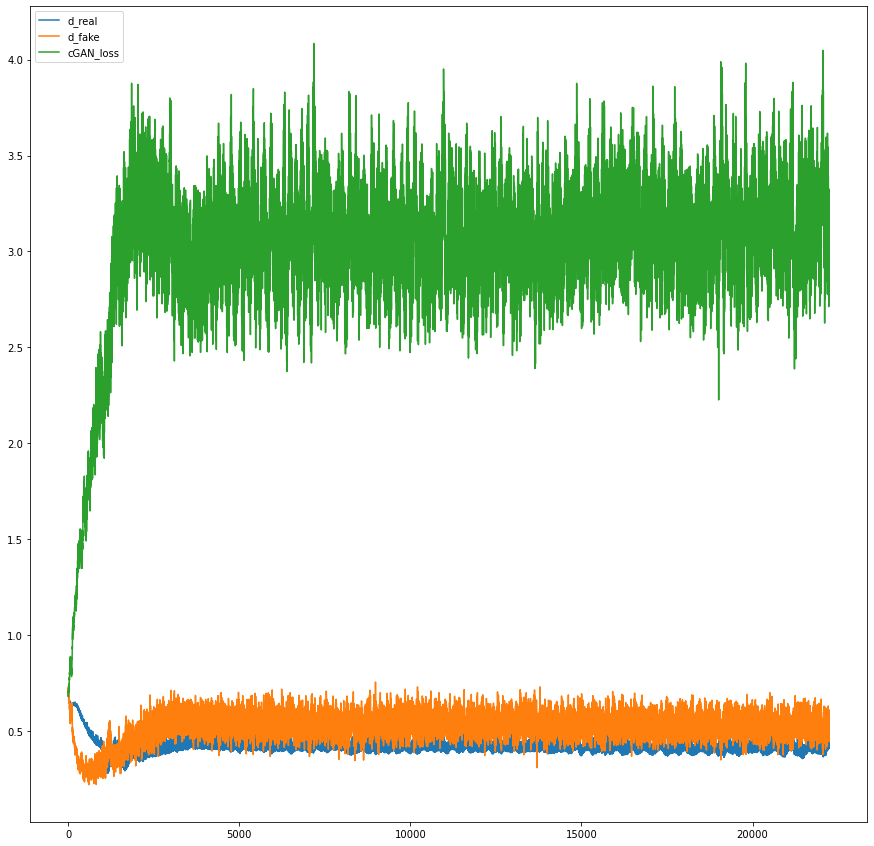

In [ ]:
# train the cGAN model
train(discriminator, generator, cgan)

In [ ]:
# generate the synthetic fraudulent
# data
def generate_new_samples (n_samples) :
    
    # get n_samples for latent space
    [X_lat, y_lat] = generate_latent_point(n_samples)
    
    # specify the labels
    y_lat = np.ones(n_samples)
    
    # predict on generator
    X_pred= generator.predict([X_lat, y_lat])
    
    # return fraud samples
    return [X_pred, y_lat]

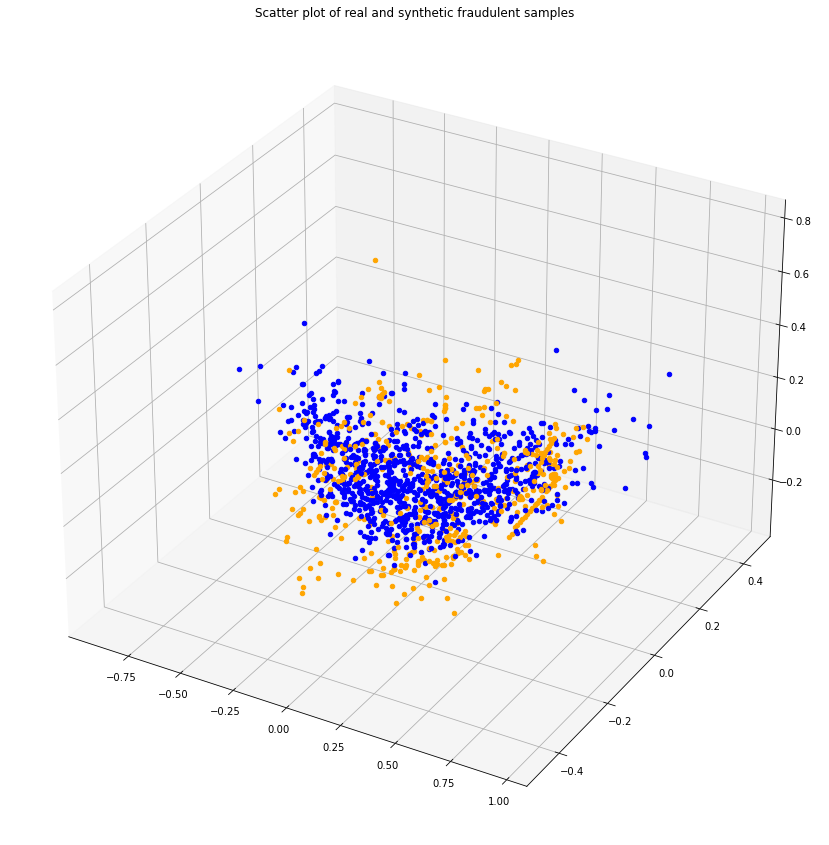

In [ ]:
# shuffle the dataframe df
df = df.sample(frac = 1.0).reset_index(drop = True)

# get 'X' and 'y'
X = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])

# scale down [-1, 1]
X = MaxAbsScaler().fit_transform(X)

# PCA
pca = PCA(n_components = 3)
X = pca.fit_transform(X)

# plot the 'real' fraud data
fig = plt.figure(figsize = (15,15))
axs = plt.axes(projection = '3d')
for i in range(X.shape[0]) :
    if y[i] == 1 :
        axs.scatter3D(X[i,0], X[i,1], X[i,2], color = 'orange')

# Synthetic data from stand-alone generator
[X_syn, y_syn] = generate_new_samples(1000)

# PCA
pca = PCA(n_components = 3)
X_syn = pca.fit_transform(X_syn)

# plot
for i in range(X_syn.shape[0]) :
    if y_syn[i] == 1.0 :
        axs.scatter3D(X_syn[i,0], X_syn[i,1], X_syn[i,2], color = 'blue')
plt.title('Scatter plot of real and synthetic fraudulent samples')
plt.show()

> To determine the performance of cGAN, let's perform **TSTR (Train on synthetic and test on real dataset)**. Separate out the real 492 fraud samples and only train the models with generated fraud data.

In [ ]:
# sort the dataframe by label
df = df.sort_values(by = ['Class'], ascending = False).reset_index(drop = True)

# get the numpy array
X = np.array(df.drop(['Class'], axis = 1))
y = np.array(df['Class'])

# scale [-1, 1]
X = MaxAbsScaler().fit_transform(X)

# Get the testing dataset
X_gan_test, y_gan_test = X[:1000,:], y[:1000]
X, y = X[1000:, :], y[1000:]

# get synthetic samples
[X_syn, y_syn] = generate_new_samples(100000)

# reshape into 2d array
y, y_syn = y.reshape(-1,1), y_syn.reshape(-1,1)

# concatenate all the arrays
X_1, X_2 = np.concatenate((X,y), axis = 1), np.concatenate((X_syn,y_syn), axis = 1)

# merge the above two arrays
X_3 = np.concatenate((X_1, X_2), axis = 0)
np.random.shuffle(X_3)

In [ ]:
# divide X_3 into feature matrix and class labels
X_gan = np.array(X_3[:,:30])
y_gan = np.array(X_3[:, 30])

In [ ]:
# parameters

# For Isolation Forest Model
ratio = float(y_gan[y_gan == 1].shape[0]/y_gan.shape[0])

# For Multi Layer Perceptron
param = {
    'nodes' : 200,
    'lrate' : 0.00005,
    'toler' : 0.00001,
    'batch_size' : 128
}

# For Random Forest Classifier
split = 2

In [ ]:
# train IsF, MLP, RFR on this dataset and test it
IsF(X_gan, y_gan, ratio)
MLP(X_gan, y_gan, param)
RFR(X_gan, y_gan, split)

IsF : 0.7848067186020861
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     85037
         1.0       0.59      0.59      0.59     30106

    accuracy                           0.78    115143
   macro avg       0.72      0.72      0.72    115143
weighted avg       0.78      0.78      0.78    115143

MLP : 0.9999913151472517
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85037
         1.0       1.00      1.00      1.00     30106

    accuracy                           1.00    115143
   macro avg       1.00      1.00      1.00    115143
weighted avg       1.00      1.00      1.00    115143

RFR : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85037
         1.0       1.00      1.00      1.00     30106

    accuracy                           1.00    115143
   macro avg       1.00      1.00      1.00    115143
weighted avg  

In [ ]:
print(models_dict)

{'IsF': IsolationForest(contamination=0.2605476189855839, n_estimators=200,
                random_state=1), 'MLP': MLPClassifier(batch_size=128, hidden_layer_sizes=(200,),
              learning_rate_init=5e-05, random_state=1, tol=1e-05, verbose=0), 'RFR': RandomForestClassifier(n_estimators=200, random_state=1)}


In [ ]:
# test the models on original fraud samples
# IsF
pred_1 = models_dict['IsF'].predict(X_gan_test)
pred_1[pred_1 ==  1] = 0
pred_1[pred_1 == -1] = 1
print('IsF : ' + str(accuracy_score(y_gan_test, pred_1)))
print(classification_report(y_gan_test,pred_1))

# MLP
pred_2 = models_dict['MLP'].predict(X_gan_test)
print('MLP : ' + str(accuracy_score(y_gan_test, pred_2)))
print(classification_report(y_gan_test,pred_2))

# RFR
pred_3 = models_dict['RFR'].predict(X_gan_test)
print('RFR : ' + str(accuracy_score(y_gan_test, pred_3)))
print(classification_report(y_gan_test,pred_3))

IsF : 0.879
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       508
           1       0.86      0.90      0.88       492

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

MLP : 0.523
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       508
           1       1.00      0.03      0.06       492

    accuracy                           0.52      1000
   macro avg       0.76      0.52      0.37      1000
weighted avg       0.75      0.52      0.37      1000

RFR : 0.508
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       508
           1       0.00      0.00      0.00       492

    accuracy                           0.51      1000
   macro avg       0.25      0.50      0.34      1000
weighted avg       0.26      0.51     

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The most likely model would be cGAN (with small oversampling to make the minority class just significant).

Looking at precision for fraudulent cases (1) lets us know the percentage of cases that are getting correctly labeled. 'Precision' accounts for false-positives. 'Recall' accounts for false-negatives. Low numbers could mean that we are constantly calling clients asking them if they actually made the transaction which could be annoying.

Goal: To get better percentages.

Our Isolation Forest method (which is Random Forest based) was able to produce a better result. Looking at the f1-score 26% (or approx. 30%) of the time we are going to detect the fraudulent transactions.

### Resources referred to
* [Generative Adversarial Nets (by Ian J. Goodfellow and Mehdi Mirza)](http://arxiv.org/pdf/1406.2661.pdf)
* [Conditional Generative Adversarial Nets (by Mehdi Mirza and Simon Osindero)](https://arxiv.org/pdf/1411.1784.pdf)
* [Possible Failure modes of GANs and Identifying them](https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/)